# Basic Vega Visualization

In [1]:
from vega import Vega

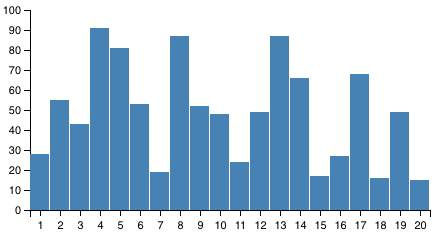

In [2]:
Vega({
  "width": 400,
  "height": 200,
  "padding": {"top": 10, "left": 30, "bottom": 30, "right": 10},
  "data": [
    {
      "name": "table",
      "values": [
        {"x": 1,  "y": 28}, {"x": 2,  "y": 55},
        {"x": 3,  "y": 43}, {"x": 4,  "y": 91},
        {"x": 5,  "y": 81}, {"x": 6,  "y": 53},
        {"x": 7,  "y": 19}, {"x": 8,  "y": 87},
        {"x": 9,  "y": 52}, {"x": 10, "y": 48},
        {"x": 11, "y": 24}, {"x": 12, "y": 49},
        {"x": 13, "y": 87}, {"x": 14, "y": 66},
        {"x": 15, "y": 17}, {"x": 16, "y": 27},
        {"x": 17, "y": 68}, {"x": 18, "y": 16},
        {"x": 19, "y": 49}, {"x": 20, "y": 15}
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "ordinal",
      "range": "width",
      "domain": {"data": "table", "field": "x"}
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "domain": {"data": "table", "field": "y"},
      "nice": True
    }
  ],
  "axes": [
    {"type": "x", "scale": "x"},
    {"type": "y", "scale": "y"}
  ],
  "marks": [
    {
      "type": "rect",
      "from": {"data": "table"},
      "properties": {
        "enter": {
          "x": {"scale": "x", "field": "x"},
          "width": {"scale": "x", "band": True, "offset": -1},
          "y": {"scale": "y", "field": "y"},
          "y2": {"scale": "y", "value": 0}
        },
        "update": {
          "fill": {"value": "steelblue"}
        },
        "hover": {
          "fill": {"value": "red"}
        }
      }
    }
  ]
})

In [14]:
import pandas as pd
df = pd.read_json('./data/iris.json')
Vega({
  "width": 600,
  "height": 600,
  "data": [
    {
      "name": "iris",
      "url": "./data/iris.json"
    },
    {
      "name": "fields",
      "values": ["petalWidth", "petalLength", "sepalWidth", "sepalLength"]
    }
  ],
  "scales": [
    {
      "name": "gx",
      "type": "ordinal",
      "range": "width",
      "round": True,
      "domain": {"data": "fields", "field": "data"}
    },
    {
      "name": "gy",
      "type": "ordinal",
      "range": "height",
      "round": True,
      "reverse": True,
      "domain": {"data": "fields", "field": "data"}
    },
    {
      "name": "c",
      "type": "ordinal",
      "domain": {"data": "iris", "field": "species"},
      "range": "category10"
    }
  ],
  "legends": [
    {
      "fill": "c",
      "title": "Species",
      "offset": 10,
      "properties": {
        "symbols": {
          "fillOpacity": {"value": 0.5},
          "stroke": {"value": "transparent"}
        }
      }
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "data": "fields",
        "transform": [{"type": "cross"}]
      },
      "properties": {
        "enter": {
          "x": {"scale": "gx", "field": "a.data"},
          "y": {"scale": "gy", "field": "b.data"},
          "width": {"scale": "gx", "band": True, "offset":-35},
          "height": {"scale": "gy", "band": True, "offset":-35},
          "fill": {"value": "#fff"},
          "stroke": {"value": "#ddd"}
        }
      },
      "scales": [
        {
          "name": "x",
          "range": "width",
          "zero": False,
          "round": True,
          "domain": {"data": "iris", "field": {"parent": "a.data"}}
        },
        {
          "name": "y",
          "range": "height",
          "zero": False,
          "round": True,
          "domain": {"data": "iris", "field": {"parent": "b.data"}}
        }
      ],
      "axes": [
        {"type": "x", "scale": "x", "ticks": 5},
        {"type": "y", "scale": "y", "ticks": 5}
      ],
      "marks": [
        {
          "type": "symbol",
          "from": {"data": "iris"},
          "properties": {
            "enter": {
              "x": {"scale": "x", "field": {"datum": {"parent": "a.data"}}},
              "y": {"scale": "y", "field": {"datum": {"parent": "b.data"}}},
              "fill": {"scale": "c", "field": "species"},
              "fillOpacity": {"value": 0.5}
            },
            "update": {
              "size": {"value": 36},
              "stroke": {"value": "transparent"}
            },
            "hover": {
              "size": {"value": 100},
              "stroke": {"value": "white"}
            }
          }
        }
      ]
    }
  ]
}, df)